In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
from IPython.display import display, HTML

In [4]:
# Load dataset
df = pd.read_excel(r"C:\Users\32han\Downloads\zepto_v1.xlsx")

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
# Clean columns
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

NameError: name 'df' is not defined

In [ ]:
# Ensure numeric columns
numeric_columns = ['mrp', 'discountedsellingprice', 'discountpercent', 'availablequantity', 'quantity']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

<h1>1. Average Discount per Category</h1>
<h4>This plot shows which product categories offer the highest average discounts. A higher value indicates a promotional focus or lower pricing strategy in that category.</h4>

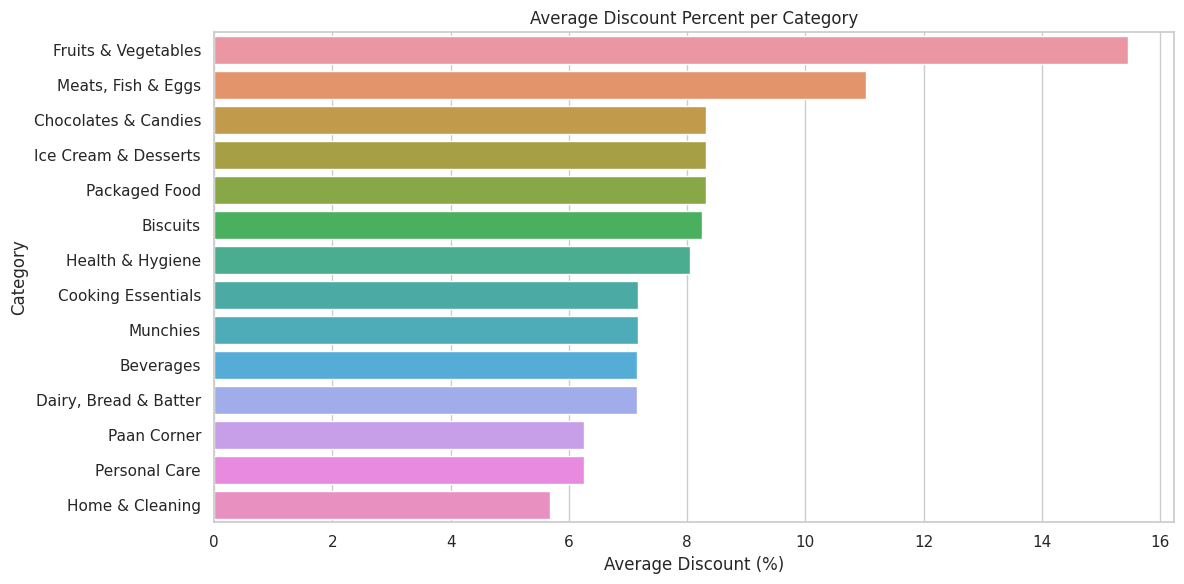

In [ ]:
# Average discount per category
plt.figure(figsize=(12, 6))
avg_discount = df.groupby('category')['discountpercent'].mean().sort_values(ascending=False)
sns.barplot(x=avg_discount.values, y=avg_discount.index)
plt.title("Average Discount Percent per Category")
plt.xlabel("Average Discount (%)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

<h1>2. Product Count per Category</h1>
<h4>This plot reveals the distribution of product volume across categories. Categories with the highest count indicate more product variety or emphasis in Zepto's inventory.</h4>

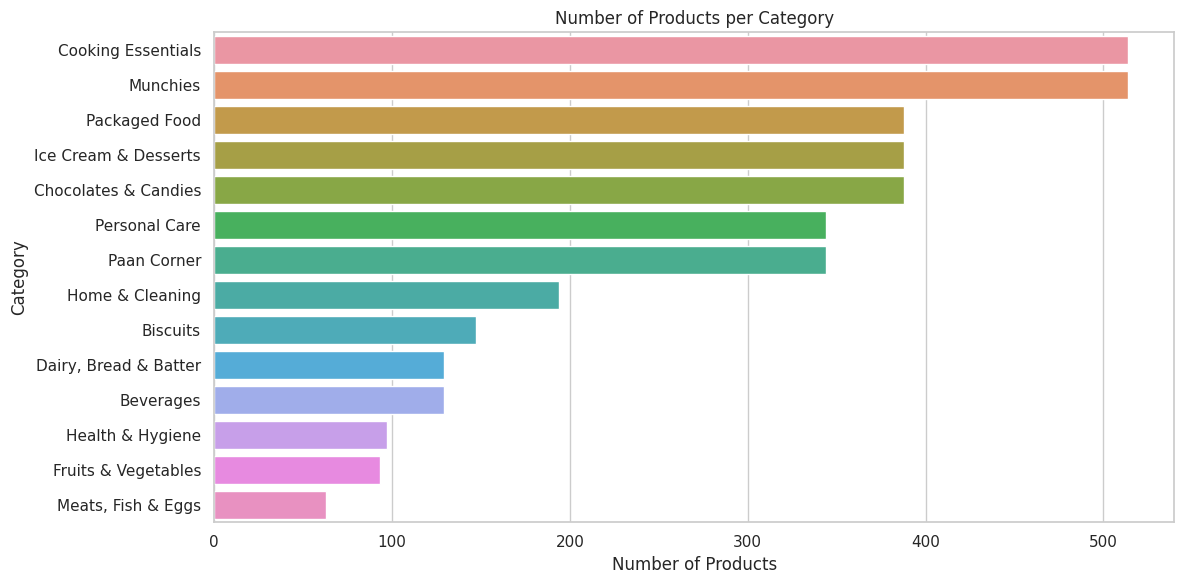

In [ ]:
# Product count per category
plt.figure(figsize=(12, 6))
product_count = df['category'].value_counts()
sns.barplot(x=product_count.values, y=product_count.index)
plt.title("Number of Products per Category")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

<h1>3. Sunburst Plot</h1>
<h3>Which categories have more high-discount items?

Which discount ranges contribute most to out-of-stock issues?</h3>

In [ ]:

# Create discount bucket
df['discount_bucket'] = pd.cut(df['discountpercent'], bins=[0, 10, 20, 30, 50, 100],
                                labels=['0-10%', '11-20%', '21-30%', '31-50%', '51%+'])

# Convert outofstock to readable label
df['stock_status'] = df['outofstock'].map({False: 'In Stock', True: 'Out of Stock'})

# Drop rows with missing path components
sunburst_df = df.dropna(subset=['category', 'discount_bucket', 'stock_status'])

# Create Sunburst Plot
fig = px.sunburst(sunburst_df,
                  path=['category', 'discount_bucket', 'stock_status'],
                  values='availablequantity',
                  color='discount_bucket',
                  title="Sunburst: Category → Discount → Stock Status",
                  height=600)
fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)
/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)


<h1>4. Top Categories by Total Stock</h1>
<h3>Shows how stocked each category is.</h3>

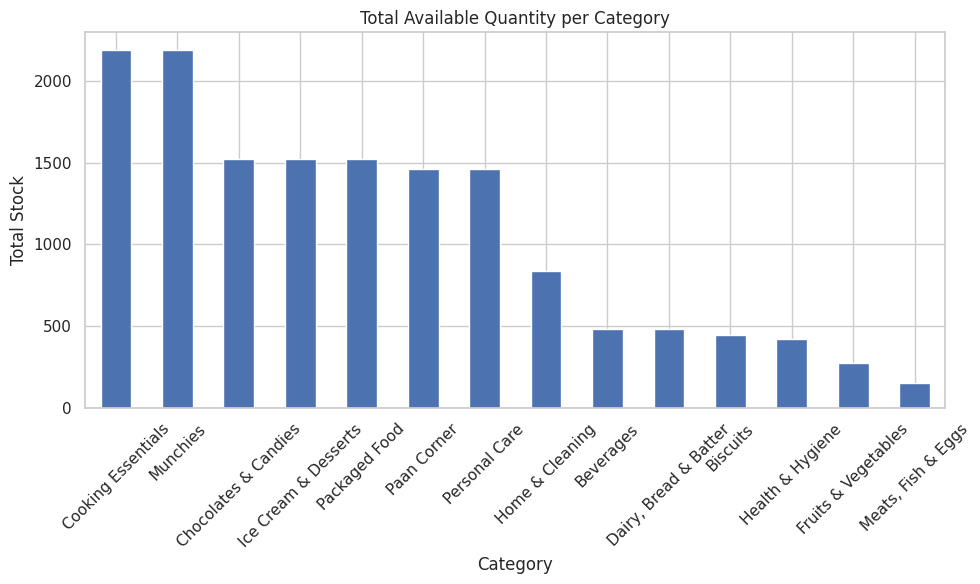

In [ ]:
# Top Categories by Total Stock
df.groupby('category')['availablequantity'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title("Total Available Quantity per Category")
plt.xlabel("Category")
plt.ylabel("Total Stock")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>5.Top 10 Discounted Products</h1>
<h4>This visualization highlights individual products with the steepest discounts, which can indicate overstock, short shelf life, or aggressive pricing.</h4>

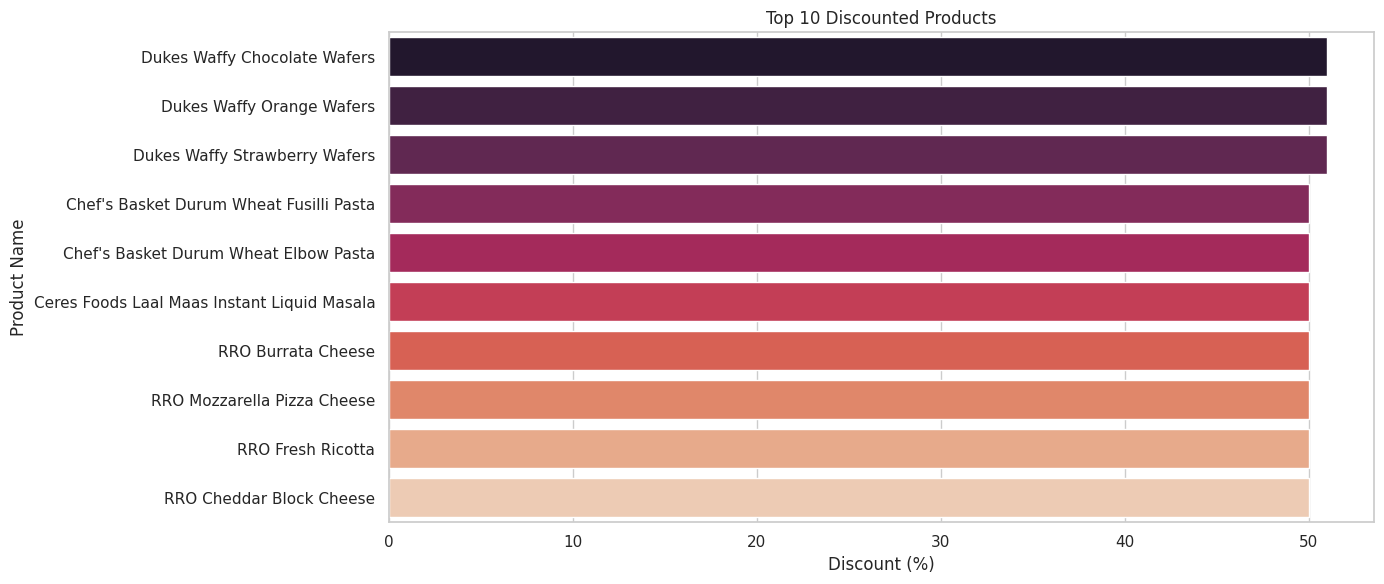

In [ ]:
top_discounts = df.sort_values(by='discountpercent', ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x='discountpercent', y='name', data=top_discounts, palette="rocket")
plt.title("Top 10 Discounted Products")
plt.xlabel("Discount (%)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

<h1>6. Price Distribution per Category (Boxplot)</h1>
<h4>Boxplots illustrate how prices are spread across categories. Wider spreads suggest varied product pricing; outliers may represent premium items.</h4>

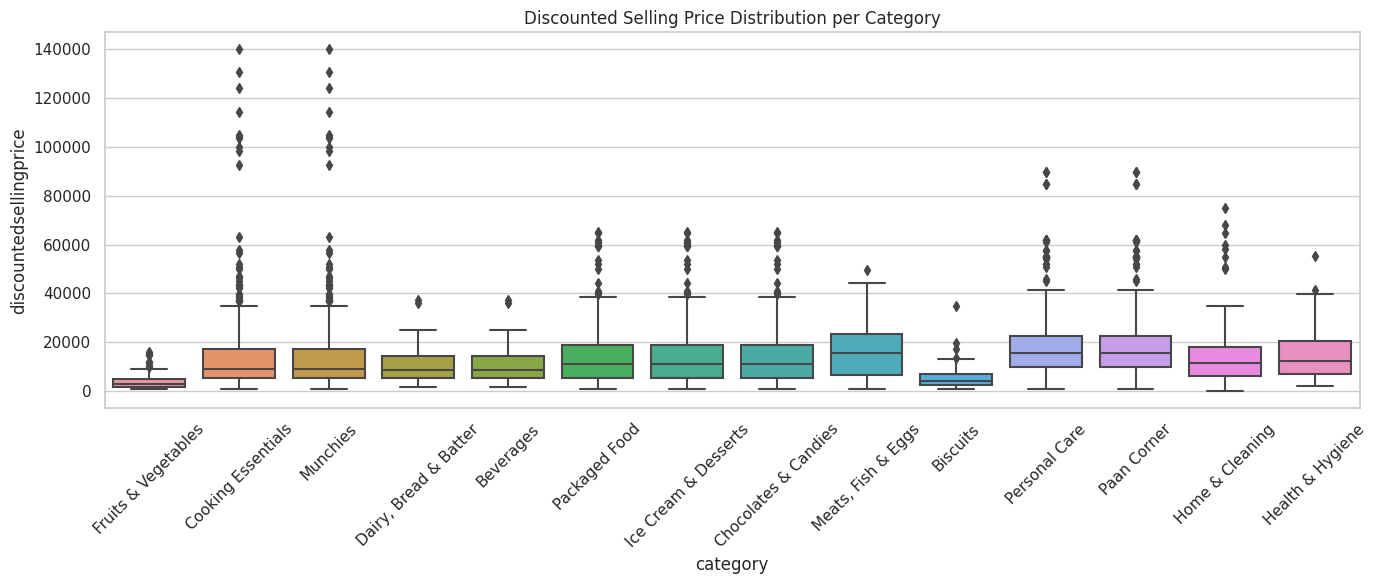

In [ ]:
# Box Plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='category', y='discountedsellingprice')
plt.title("Discounted Selling Price Distribution per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>7. MRP vs.Discounted Price (Scatter)</h1>
<h4>This scatter plot shows the relationship between original and discounted prices. Points below the diagonal imply effective discounts being applied.</h4>

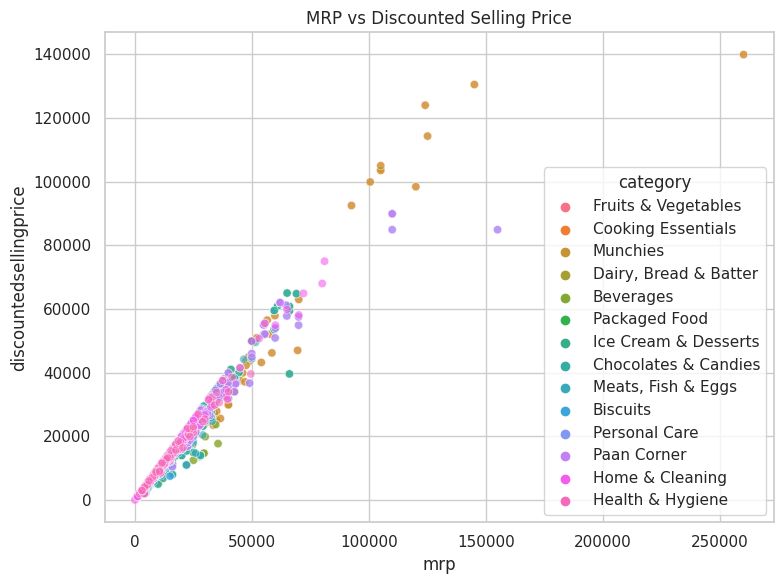

In [ ]:
# Scatter Plot: MRP vs Discounted Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='mrp', y='discountedsellingprice', hue='category', alpha=0.6)
plt.title("MRP vs Discounted Selling Price")
plt.tight_layout()
plt.show()

<h1>8. Discount Percent vs. Stock Quantity (Scatter)</h1>
<h3>This plot helps assess whether larger discounts correlate with higher stock levels. This can reflect clearance strategies.</h3>

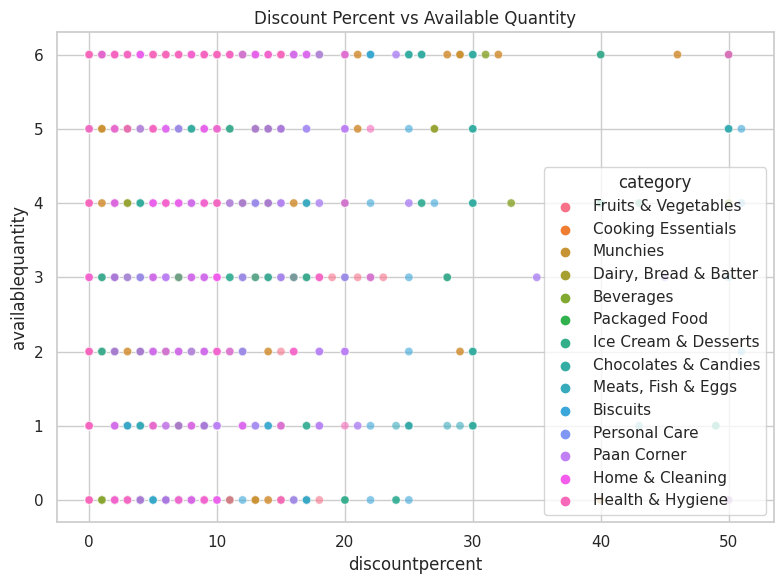

In [ ]:
# Scatter Plot: Discount vs Available Quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='discountpercent', y='availablequantity', hue='category', alpha=0.6)
plt.title("Discount Percent vs Available Quantity")
plt.tight_layout()
plt.show()

<h1>9. Price Difference Analysis</h1>
<h3>Gives insights into how much Zepto is discounting.</h3>

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



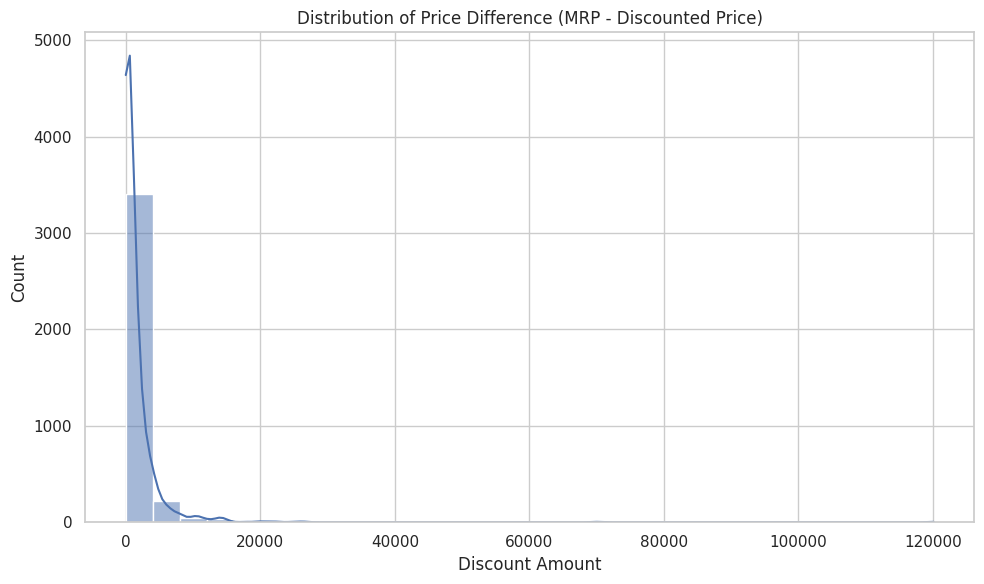

In [ ]:
# Price Difference Analysis
df['price_diff'] = df['mrp'] - df['discountedsellingprice']
plt.figure(figsize=(10, 6))
sns.histplot(df['price_diff'], bins=30, kde=True)
plt.title("Distribution of Price Difference (MRP - Discounted Price)")
plt.xlabel("Discount Amount")
plt.tight_layout()
plt.show()

<h1>10. Product Distribution by Category (Pie Chart)</h1>
<h3>Pie charts give a snapshot of how Zepto's offerings are split among categories, indicating focus areas.</h3>

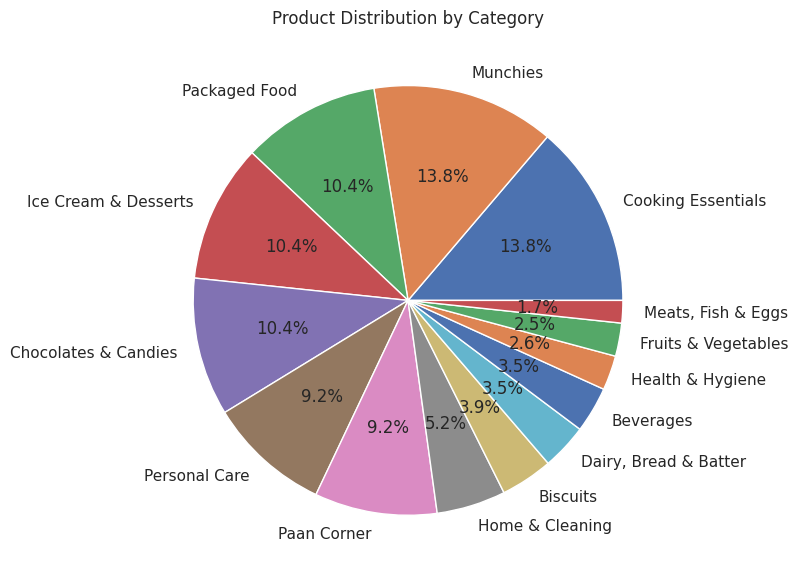

In [ ]:
# Pie Chart: Category share
df['category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title("Product Distribution by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

<h1>11. Stock Availability (Pie Chart)</h1>
<h3>This shows the proportion of products in stock vs. out of stock. A high out-of-stock ratio could impact customer experience.</h3>

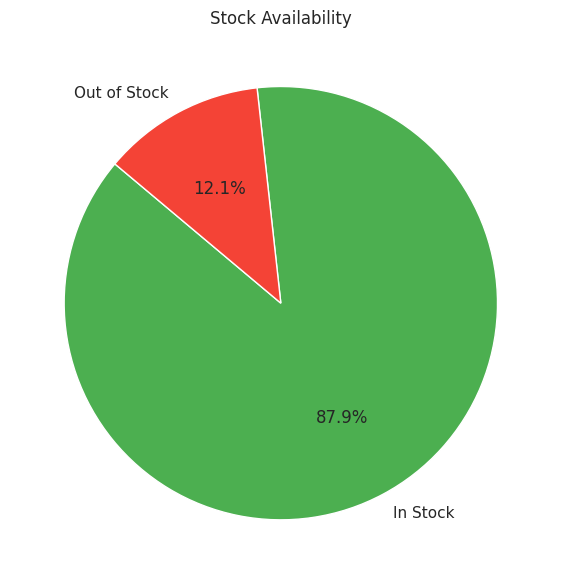

In [ ]:
# Count in-stock and out-of-stock items
stock_counts = df['outofstock'].value_counts()
labels = ['In Stock', 'Out of Stock']
colors = ['#4caf50', '#f44336']  # Green and Red

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(stock_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'white'})
plt.title("Stock Availability")
plt.tight_layout()
plt.show()

<h1>12. Discount Percent Distribution (Histogram)</h1>
<h3>This histogram helps understand how discounts are generally spread across products, revealing overall discounting intensity.</h3>

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



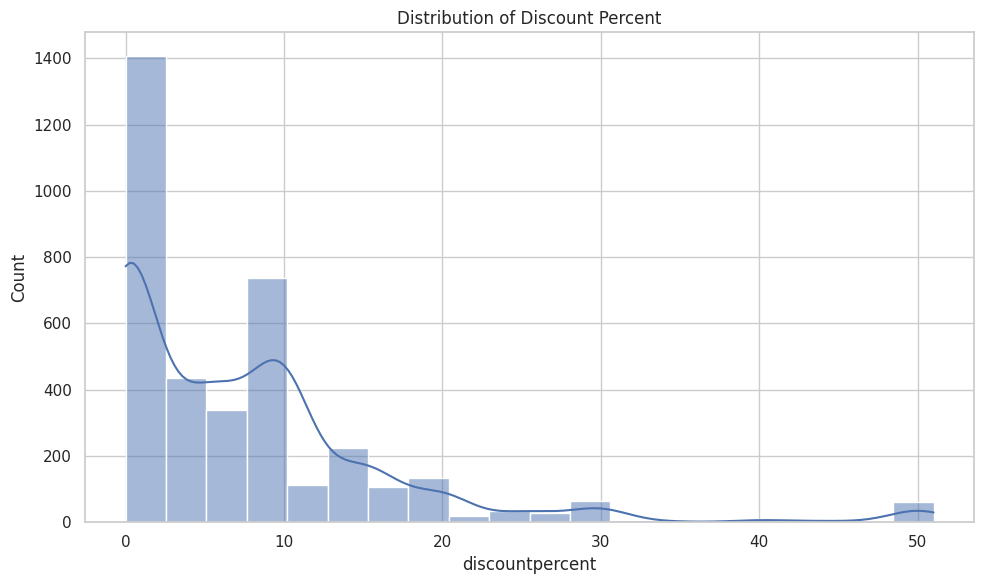

In [ ]:
# Histogram: Discount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['discountpercent'], bins=20, kde=True)
plt.title("Distribution of Discount Percent")
plt.tight_layout()
plt.show()

<h1>13. MRP Value Distribution (Histogram)</h1>
<h3>Shows how MRPs are distributed across the inventory, providing insight into price ranges Zepto targets.</h3>

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



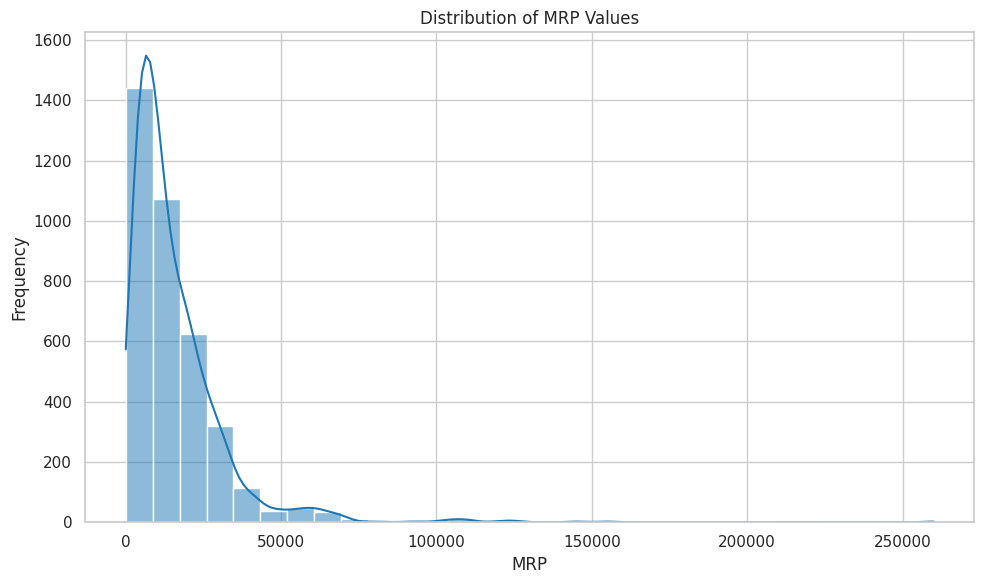

In [ ]:
# Ensure 'mrp' column is numeric
df['mrp'] = pd.to_numeric(df['mrp'], errors='coerce')

# Drop rows with missing or invalid MRP values
valid_mrp = df['mrp'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(valid_mrp, bins=30, kde=True, color='#1f77b4')
plt.title("Distribution of MRP Values")
plt.xlabel("MRP")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<h1>14. Correlation Heatmap</h1>
<h3>This heatmap reveals how numerical features like price, discount, and quantity relate to one another. Useful for spotting patterns or dependencies.</h3>

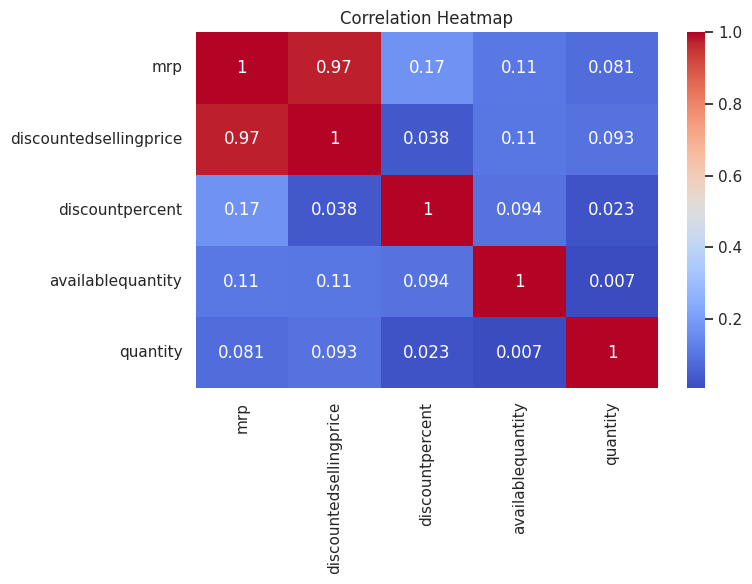

In [ ]:
# Heatmap: Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

<h1>15. Violin Plot of Discounts by Category</h1>
<h3>Violin plots show both the range and concentration of discount values. Some categories may have narrow pricing strategies, others broader.</h3>

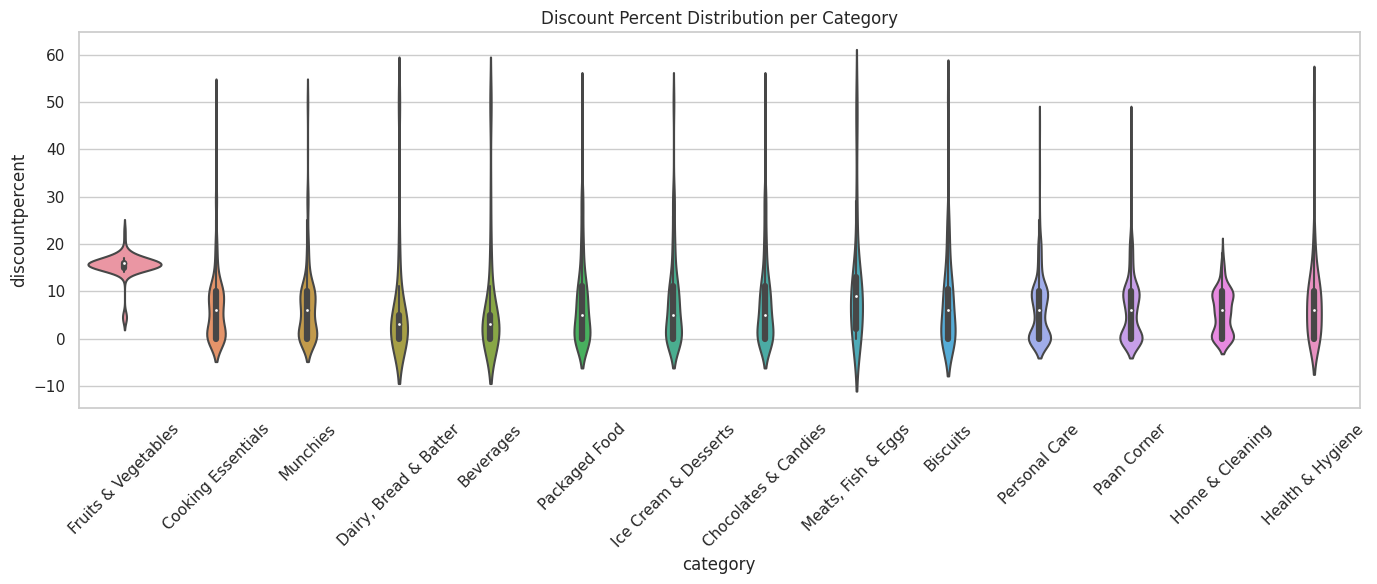

In [ ]:
# Define and create the output directory if it doesn't exist
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

# Violin Plot: Discount % per category
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='category', y='discountpercent')
plt.title("Discount Percent Distribution per Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_dir}/violin_discount_by_category.png")
plt.show()

<h1>16. Bubble Chart - Discount vs Price vs Stock</h1>
<h3>This multi-variable plot visualizes how discount % and price relate, while bubble size shows available stock. It’s great for identifying heavily stocked, discounted items.</h3>

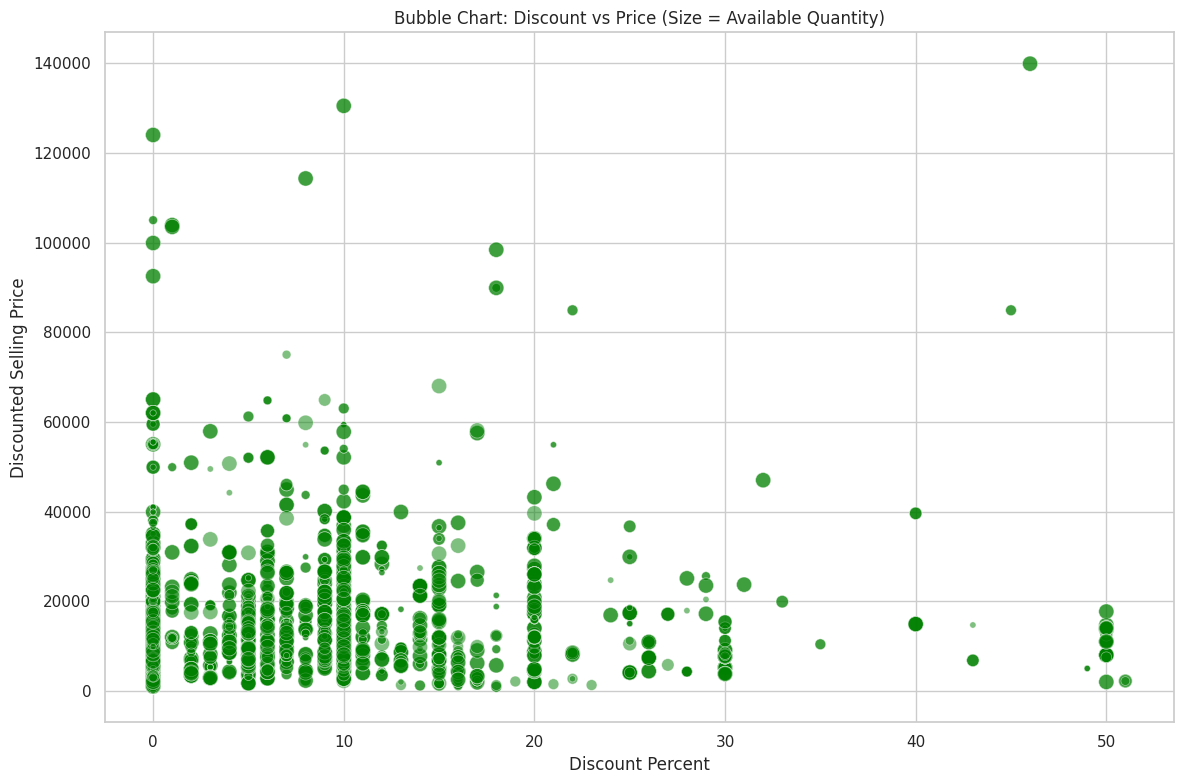

In [ ]:
# Bubble Chart: Discount % vs Price with bubble size = available quantity
plt.figure(figsize=(12, 8))
bubble = df.copy()
plt.scatter(bubble['discountpercent'], bubble['discountedsellingprice'],
            s=bubble['availablequantity']*20, alpha=0.5, c='green', edgecolors='w', linewidth=0.5)
plt.xlabel("Discount Percent")
plt.ylabel("Discounted Selling Price")
plt.title("Bubble Chart: Discount vs Price (Size = Available Quantity)")
plt.tight_layout()
plt.savefig(f"{output_dir}/bubble_discount_vs_price.png")
plt.show()

<h1>17.Quantity Pack Analysis</h1>
<h3>Finds most frequent pack sizes </h3>

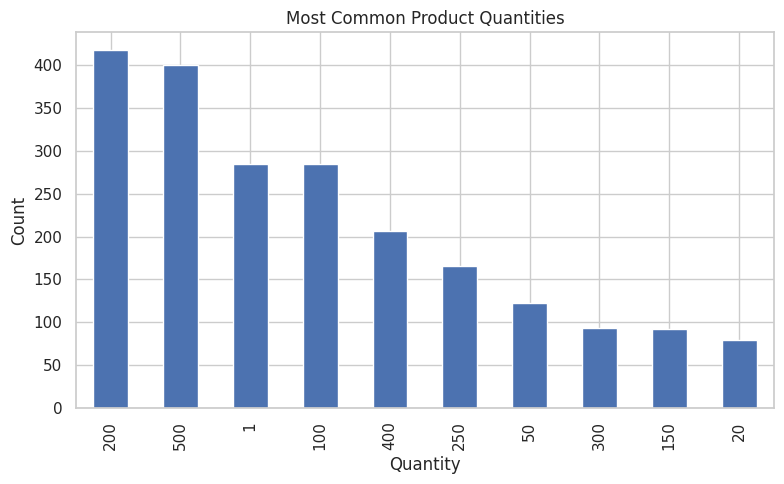

In [ ]:
# Quantity Pack Analysis
df['quantity'].value_counts().head(10).plot(kind='bar', figsize=(8,5))
plt.title("Most Common Product Quantities")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<h1>18. Sorted Discount Trend (Line Plot)</h1>
<h3>Displays the entire range of discounts sorted in descending order. It helps visualize pricing aggressiveness across products.</h3>

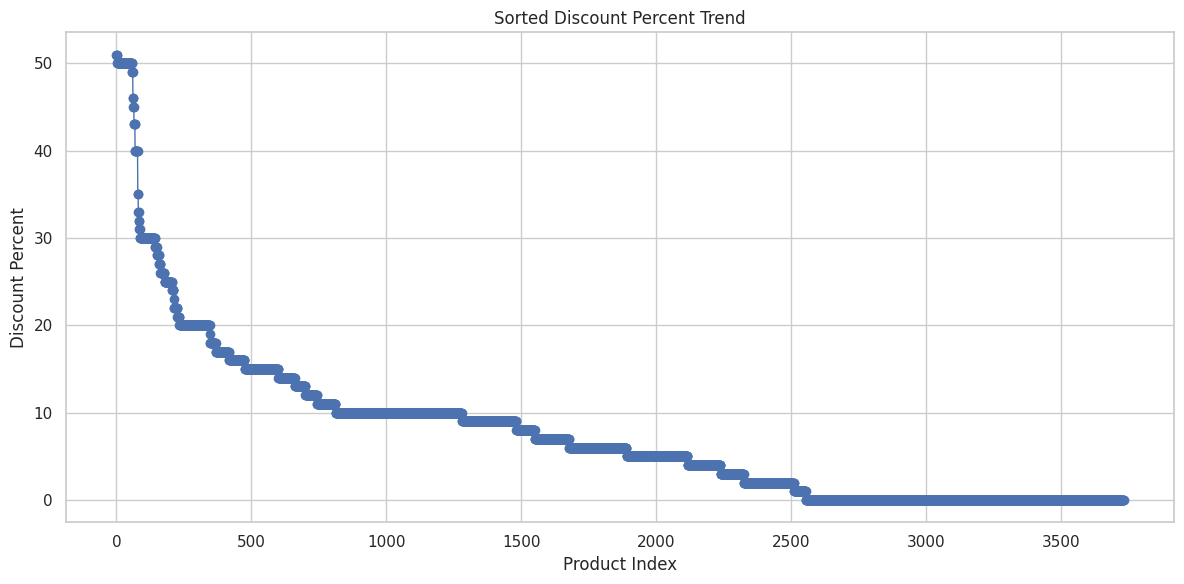

In [ ]:
# Line Chart: Discount trend (sorted)
sorted_discounts = df.sort_values(by='discountpercent', ascending=False)['discountpercent'].reset_index(drop=True)
plt.figure(figsize=(12, 6))
plt.plot(sorted_discounts, marker='o', linewidth=1)
plt.title("Sorted Discount Percent Trend")
plt.xlabel("Product Index")
plt.ylabel("Discount Percent")
plt.tight_layout()
plt.savefig(f"{output_dir}/line_discount_trend.png")
plt.show()

# 19. Word Cloud – Most Frequent Product Names

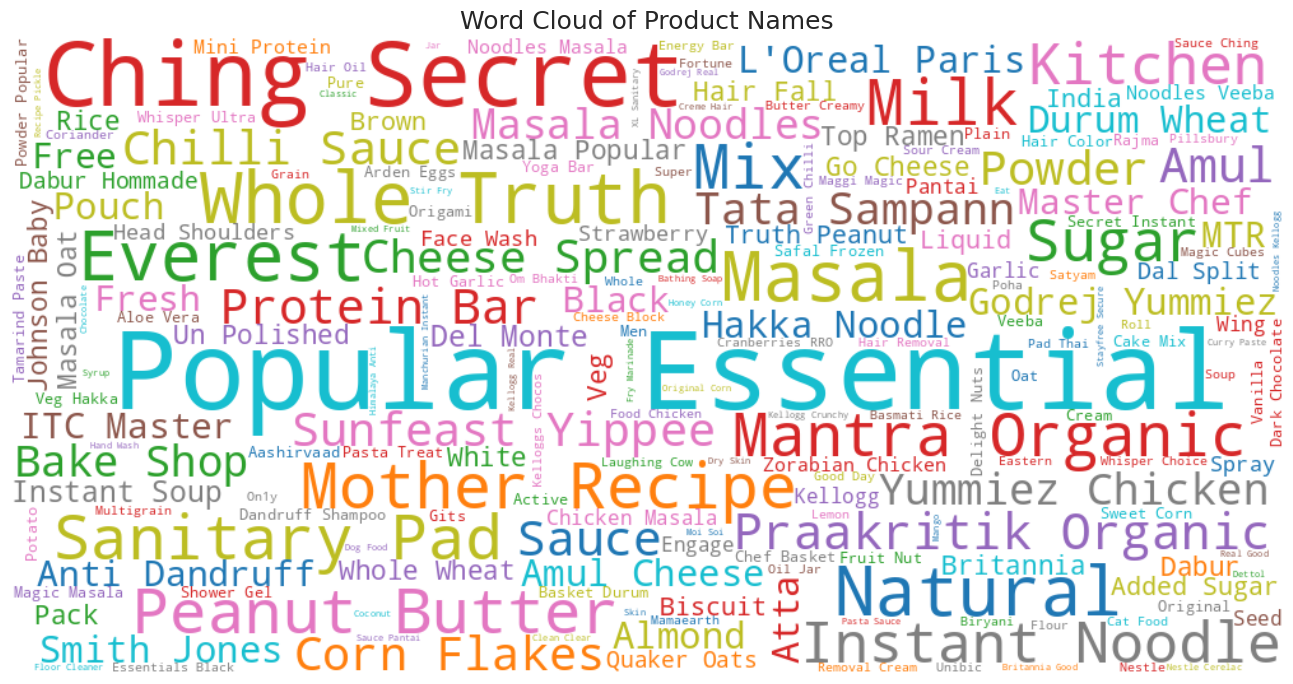

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all names into one string
text = ' '.join(df['name'].dropna().astype(str))

# Generate and plot word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='tab10').generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Product Names", fontsize=18)
plt.tight_layout()
plt.show()

# 20. 📦 Final Summary

<h3>Insights About Zepto from This Dataset</h3>

- **Product Variety**: Zepto has a strong focus on essential categories like groceries, dairy, and packaged food, as shown by high product counts in these segments.
- **Pricing Strategy**: Significant discounts are applied on many items, especially in certain categories, suggesting a competitive or volume-driven pricing model.
- **Stock Management**: While most items are in stock, the presence of out-of-stock items in some categories could reflect demand-supply mismatches.
- **Category Prioritization**: Categories like Fruits & Vegetables and Cooking Essentials dominate in variety, indicating core business strengths.
- **Value Proposition**: The combination of aggressive discounts and product spread suggests Zepto is targeting both value-seeking and convenience-driven customers.

This analysis can help Zepto optimize inventory, pricing, and category focus while improving customer satisfaction.
"""